Importing the neccesary libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('dataset1.csv')
data.head(3)
data_ =  data.copy(deep=True)

Checking the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


From the above it is observed that there are missing values and also presence of categorical variables, so there will have to a need to onehotencode those features

Checking the descriptive statistic of the data

In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


Checking for the presence of duplicated values present in the data 

In [5]:
data.duplicated().sum()

0

There are no duplicated values present in the data

Checking the null values present in the data

In [6]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

The following features has missing values, Mileage, Engine,Power, Seats, New_Price, But the new_price feature will be dropped because it has a lot of missing values.

In [7]:
columns = data.columns

 from the above, the following features has units,which makes them categorical, so the units will have to removed Mileage, Engine, Power	

For the mileage feature, the unit has the length of 4 with the empty space making it 5, so we will have to drop the last characters in all the samples of the features

In [8]:
data['Mileage'] = data['Mileage'].map(lambda x : str(x)[0:-5])
data['Mileage'] = pd.to_numeric(data['Mileage'])

Successfully converted the mileage feature into a numeric column.

Converting the Engine column to a numeric column, since the last three characters are not needed, they will be removed from each item

In [9]:
data['Engine'] = data['Engine'].map(lambda x: str(x)[:-3])
data['Engine'] = pd.to_numeric(data['Engine'])

The Engine feature has  been successfully converted to a numeric feature.

Converting the Power feature from a categorical feature into a numeric feature. In the power feature, the last four characters of each element is not needed.

In [10]:
data['Power'] = data['Power'].map(lambda x : str(x)[:-4])
data['Power'] = pd.to_numeric(data['Power'], errors = 'coerce')

In [11]:
data['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

The power feature has been successfully converted to a numerical feature.

The following columns will be dropped, Name, because it can not improve the quality of the model, New_Price, because it has a higher percentage of its values missing. and then the rest of the categorical variable  will be one hot encoded.

In [12]:
data = data.drop(columns = ['Name', 'New_Price'])

The Name and New_Price feature of the data has been dropped

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 564.4+ KB


Rechecking the distribution of the data again 


In [14]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


From the above, it is observed that some cars has a mileage of 0 and some has seat of zero,which are technically possible 

Dropping the sample with the number of seats to be zero 

In [15]:
data[ data['Seats'] == data['Seats'].min() ]

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,18.0


There is only one sample of the data with the number of seats to be zero which is an anomaly.

In [16]:
idx = data[ data['Seats'] == data['Seats'].min() ].index
data = data.drop(index = idx)

Dropping all the samples with a mileage if 0

In [17]:
len(data[ data['Mileage'] == data['Mileage'].min() ])

68

There are 68 samples with a mileage of 0  

In [18]:
idx = data[ data['Mileage'] == data['Mileage'].min() ].index
data = data.drop(index = idx)

One Hot encoding the data so as to convert the categorical data into numerical data that can be  used by the machine learning algorithm. Using the pandas pd.get_dummies()  

In [19]:
data = pd.get_dummies(data, drop_first=True)

Since it is supervised learning task, it involves both the dependent and the independent variable, so the data will be divived into dependent and independent variable and also into the train and test split

In [20]:
X =  data.drop(columns='Price')
Xcols = X.columns

In [21]:
y = data['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=4)

In [23]:
X_train.shape, X_test.shape

((4165, 25), (1785, 25))

In [24]:
y_train.shape, y_test.shape

((4165,), (1785,))

Filling out the null values using the KNNImputer, 

In [25]:
imputer = KNNImputer()
X_train = imputer.fit_transform(X_train,y_train )
X_test = imputer.fit_transform(X_test, y_test)

Confirming that there are no longer null values present in the dataset.

In [26]:
X_check = pd.DataFrame(X_train, columns = Xcols)
X_check.isnull().sum()

Unnamed: 0                   0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [27]:
X_check = pd.DataFrame(X_test, columns = Xcols)
X_check.isnull().sum()

Unnamed: 0                   0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

From the above, it has been confirmed that there are no null values present in the data again.

Checking for the distribution of the years of the cars 

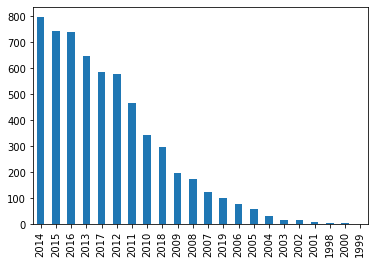

In [29]:
data_['Year'].value_counts().plot(kind='bar')
plt.show()

There is a gradual progression of the years of the car, as the years progress the frequency of the cars increases

Checking the distributions of the Locations of the cars

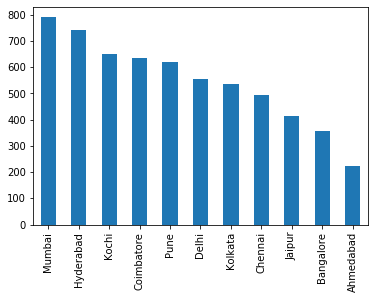

In [35]:
data_['Location'].value_counts().plot(kind = 'bar')
plt.show()

From the above, Mumbai has the largest number of cars while Ahmedabad has the least

Checking for the distributions of the Transmission Type

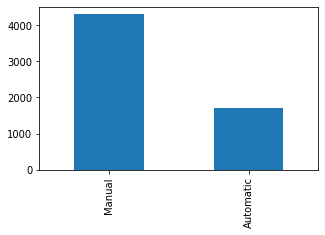

In [40]:
plt.figure(figsize=(5,3))
data_['Transmission'].value_counts().plot(kind = 'bar')
plt.show()

From the above, it is observed that cars with Manual transmission are more than the those with automatic transmission


Checking for the state with the highest price of car

In [47]:
data_[ data_['Price'] == data_['Price'].max() ]['Location']

4079    Hyderabad
Name: Location, dtype: object

Hyderabad is the state with the most expensive car

Scaling the data using the standard scaler from sklearn 

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Setting up the algorithms  to be used to create the model.

In [64]:
algorithms = {
    
    'Linear Regression' : {
        'Model' : LinearRegression(),
        'Params' : {
            'normalize' : [True, False]
        }
    }, 
    
    'Lasso' : {
        'Model': Lasso(),
        'Params' : {
            'alpha' : [i for i in range(1,6)],
            'normalize' : [True, False]
        }
    }, 
    
    'Ridge' : {
        'Model': Ridge(),
        'Params' : {
            'alpha' : [i for i in range(1,6)],
            'normalize' : [True, False]
        }
    }, 
    
    'SVR' : {
        'Model': SVR(),
        'Params' : {
            'kernel' : ['poly', 'linear', 'rbf', 'sigmoid' ],
            'degree' : [i for i in range(1,6)],
        }
    }, 
    
    'Decision Tree Regressor' : {
        'Model': DecisionTreeRegressor(),
        'Params' : {
            
            'criterion' : ["mse", "mae" ]
        }
    }, 
    
    'Random Forest Regressor' : {
        'Model': RandomForestRegressor(),
        'Params' : {
            'n_estimators' : [i for i in range(50, 300, 50)],
            'criterion' : ["mse", "mae" ]
        }
    }, 
    
    'Extra Trees Regressor' : {
        'Model': ExtraTreesRegressor(),
        'Params' : {
            'n_estimators' : [i for i in range(50, 300, 50)],
            'criterion' : ["mse", "mae" ]
        }
    }, 
    
}

In [67]:
acc = []
for model_name, params in algorithms.items():
    grid= GridSearchCV(params['Model'], param_grid = params['Params'], verbose=10, cv=5 )
    grid.fit(X_train, y_train)
    acc.append({'Model' : model_name, 'Best Score' : grid.best_score_, 'Best Parameters': grid.best_params_ })
    
    

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.754, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.717, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.745, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.726, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.584, total=   0.0s
[CV] normalize=False .................................................
[CV] ..................... normalize=False, score=0.754, total=   0.0s
[CV] normalize=False .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap


[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.710, total=   0.0s
[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.672, total=   0.0s
[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.593, total=   0.0s
[CV] alpha=2, normalize=True .........................................
[CV] ............ alpha=2, normalize=True, score=-0.000, total=   0.0s
[CV] alpha=2, normalize=True .........................................
[CV] ............ alpha=2, normalize=True, score=-0.010, total=   0.0s
[CV] alpha=2, normalize=True .........................................
[CV] ............ alpha=2, normalize=True, score=-0.002, total=   0.0s
[CV] alpha=2, normalize=True .........................................
[CV] ............ alpha=2, normalize=True, score=-0.001, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=3, normalize=False ........................................
[CV] ............ alpha=3, normalize=False, score=0.520, total=   0.0s
[CV] alpha=3, normalize=False ........................................
[CV] ............ alpha=3, normalize=False, score=0.464, total=   0.0s
[CV] alpha=4, normalize=True .........................................
[CV] ............ alpha=4, normalize=True, score=-0.000, total=   0.0s
[CV] alpha=4, normalize=True .........................................
[CV] ............ alpha=4, normalize=True, score=-0.010, total=   0.0s
[CV] alpha=4, normalize=True .........................................
[CV] ............ alpha=4, normalize=True, score=-0.002, total=   0.0s
[CV] alpha=4, normalize=True .........................................
[CV] ............ alpha=4, normalize=True, score=-0.001, total=   0.0s
[CV] alpha=4, normalize=True .........................................
[CV] ............ alpha=4, normalize=True, score=-0.000, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=1, normalize=True .........................................
[CV] ............. alpha=1, normalize=True, score=0.689, total=   0.0s
[CV] alpha=1, normalize=True .........................................
[CV] ............. alpha=1, normalize=True, score=0.657, total=   0.0s
[CV] alpha=1, normalize=True .........................................
[CV] ............. alpha=1, normalize=True, score=0.621, total=   0.0s
[CV] alpha=1, normalize=True .........................................
[CV] ............. alpha=1, normalize=True, score=0.547, total=   0.0s
[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.754, total=   0.0s
[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.717, total=   0.0s
[CV] alpha=1, normalize=False ........................................
[CV] ............ alpha=1, normalize=False, score=0.745, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... degree=1, kernel=poly, score=0.667, total=   1.0s
[CV] degree=1, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............... degree=1, kernel=poly, score=0.705, total=   0.9s
[CV] degree=1, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ............... degree=1, kernel=poly, score=0.664, total=   0.9s
[CV] degree=1, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] ............... degree=1, kernel=poly, score=0.615, total=   0.9s
[CV] degree=1, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] ............... degree=1, kernel=poly, score=0.555, total=   0.9s
[CV] degree=1, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV] ............. degree=1, kernel=linear, score=0.681, total=   1.6s
[CV] degree=1, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.1s remaining:    0.0s


[CV] ............. degree=1, kernel=linear, score=0.719, total=   1.9s
[CV] degree=1, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.0s remaining:    0.0s


[CV] ............. degree=1, kernel=linear, score=0.680, total=   1.6s
[CV] degree=1, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.7s remaining:    0.0s


[CV] ............. degree=1, kernel=linear, score=0.629, total=   1.6s
[CV] degree=1, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.3s remaining:    0.0s


[CV] ............. degree=1, kernel=linear, score=0.566, total=   1.7s
[CV] degree=1, kernel=rbf ............................................
[CV] ................ degree=1, kernel=rbf, score=0.801, total=   1.5s
[CV] degree=1, kernel=rbf ............................................
[CV] ................ degree=1, kernel=rbf, score=0.765, total=   1.4s
[CV] degree=1, kernel=rbf ............................................
[CV] ................ degree=1, kernel=rbf, score=0.719, total=   1.4s
[CV] degree=1, kernel=rbf ............................................
[CV] ................ degree=1, kernel=rbf, score=0.685, total=   1.4s
[CV] degree=1, kernel=rbf ............................................
[CV] ................ degree=1, kernel=rbf, score=0.603, total=   1.4s
[CV] degree=1, kernel=sigmoid ........................................
[CV] ............ degree=1, kernel=sigmoid, score=0.261, total=   1.5s
[CV] degree=1, kernel=sigmoid ........................................
[CV] .

[CV] ............. degree=4, kernel=linear, score=0.680, total=   1.8s
[CV] degree=4, kernel=linear .........................................
[CV] ............. degree=4, kernel=linear, score=0.629, total=   1.6s
[CV] degree=4, kernel=linear .........................................
[CV] ............. degree=4, kernel=linear, score=0.566, total=   1.7s
[CV] degree=4, kernel=rbf ............................................
[CV] ................ degree=4, kernel=rbf, score=0.801, total=   1.4s
[CV] degree=4, kernel=rbf ............................................
[CV] ................ degree=4, kernel=rbf, score=0.765, total=   1.4s
[CV] degree=4, kernel=rbf ............................................
[CV] ................ degree=4, kernel=rbf, score=0.719, total=   1.4s
[CV] degree=4, kernel=rbf ............................................
[CV] ................ degree=4, kernel=rbf, score=0.685, total=   1.4s
[CV] degree=4, kernel=rbf ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=mse ...................................................
[CV] ....................... criterion=mse, score=0.813, total=   0.0s
[CV] criterion=mse ...................................................
[CV] ....................... criterion=mse, score=0.800, total=   0.0s
[CV] criterion=mse ...................................................
[CV] ....................... criterion=mse, score=0.749, total=   0.0s
[CV] criterion=mse ...................................................
[CV] ....................... criterion=mse, score=0.742, total=   0.0s
[CV] criterion=mse ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... criterion=mse, score=0.758, total=   0.1s
[CV] criterion=mae ...................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... criterion=mae, score=0.839, total=   1.2s
[CV] criterion=mae ...................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV] ....................... criterion=mae, score=0.817, total=   1.2s
[CV] criterion=mae ...................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.6s remaining:    0.0s


[CV] ....................... criterion=mae, score=0.743, total=   1.2s
[CV] criterion=mae ...................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s remaining:    0.0s


[CV] ....................... criterion=mae, score=0.633, total=   1.2s
[CV] criterion=mae ...................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.1s remaining:    0.0s


[CV] ....................... criterion=mae, score=0.736, total=   1.2s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... criterion=mse, n_estimators=50, score=0.921, total=   1.5s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.902, total=   1.5s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.877, total=   1.9s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.890, total=   1.8s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.789, total=   1.6s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.917, total=   3.3s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.5s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.903, total=   3.3s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.8s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.885, total=   3.3s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.1s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.885, total=   3.0s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   21.2s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.798, total=   2.9s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.919, total=   4.3s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.903, total=   4.4s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.884, total=   4.6s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.885, total=   4.4s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.796, total=   4.3s
[CV] criterion=mse, n_estimators=200 .................................
[CV] ..... criterion=mse, n_estimators=200, score=0.914, total=   5.8s
[CV] criterion=mse, n_estimators=200 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 37.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... criterion=mse, n_estimators=50, score=0.899, total=   1.3s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.913, total=   1.2s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.868, total=   1.2s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.893, total=   1.2s
[CV] criterion=mse, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV] ...... criterion=mse, n_estimators=50, score=0.804, total=   1.2s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.899, total=   2.5s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.6s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.904, total=   2.4s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.0s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.873, total=   2.5s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.5s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.890, total=   2.5s
[CV] criterion=mse, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.0s remaining:    0.0s


[CV] ..... criterion=mse, n_estimators=100, score=0.806, total=   2.5s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.906, total=   3.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.910, total=   3.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.871, total=   3.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.890, total=   3.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV] ..... criterion=mse, n_estimators=150, score=0.810, total=   3.6s
[CV] criterion=mse, n_estimators=200 .................................
[CV] ..... criterion=mse, n_estimators=200, score=0.907, total=   5.0s
[CV] criterion=mse, n_estimators=200 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 53.3min finished


In [98]:
result = pd.DataFrame(acc)
result.sort_values('Best Score', ascending = False)

,Model,Best Score,Best Parameters
6,Extra Trees Regressor,0.880200,"{'criterion': 'mae', 'n_estimators': 50}"
5,Random Forest Regressor,0.878867,"{'criterion': 'mse', 'n_estimators': 250}"
4,Decision Tree Regressor,0.772620,{'criterion': 'mse'}
3,SVR,0.724506,"{'degree': 3, 'kernel': 'poly'}"
2,Ridge,0.714349,"{'alpha': 5, 'normalize': False}"
0,Linear Regression,0.705124,{'normalize': True}
1,Lasso,0.679151,"{'alpha': 1, 'normalize': False}"


In [107]:
trees = ExtraTreesRegressor(criterion='mae', n_estimators = 50)
trees.fit(X_train, y_train)
pred = trees.predict(X_test)

In [108]:
train_pred = trees.predict(X_train)
train_score = r2_score(y_train, train_pred)
# test_score =r2_score(y_test, pred)
test_score = r2_score(y_test, pred)
print(f'This is the train score {train_score} ')
print(f'This is the test score {test_score} ')

This is the train score 1.0 
This is the test score 0.8530979797529591 


Checking for the root mean squared error and the mean absolute error

In [110]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'The root mean squared error of the model is {rmse}')
print(f'The mean squared error of the model is {mse}')
print(f'The mean absolute error of the model is {mae}')

The root mean squared error of the model is 4.400606923471121
The mean squared error of the model is 19.36534129490196
The mean absolute error of the model is 1.725949019607843
